In [42]:
#!pip install time_series_analysis
#!pip install helper
#! pip install dataframe_image
#!! pip install dataframe_image

In [63]:
# Python libraries
import pandas as pd 
from fpdf import FPDF
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
import datetime as dt
import random
import math
import os
import glob
import matplotlib.pyplot as plt   # matplot is for python graphics
import dataframe_image as dfi

# Local libraries
#from time_series_analysis import plot_states, plot_countries
#from daily_counts import plot_daily_count_states, plot_daily_count_countries
#from create_case_maps import plot_usa_case_map, plot_global_case_map
# from helper import Mode
 

In [39]:
# Define PDF settings 
path = 'C:/Users/josep/Documents/Kaleida/PDFS/' 
WIDTH = 210
HEIGHT = 297

In [40]:
pdf = FPDF();
pdf.add_page();
pdf.set_font('Arial','B',16);
pdf.cell(40,10,'Hello Population Health Analyst');
pdf.output(path + 'test.pdf','F');
 

In [43]:
# Read in the CSV SQL output for NCQA HEDIS Quality Measures 
Path_to_Raw_Data = 'c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/'
Raw_Data_File_Name_1 = 'GPPC_PCP_Lancaster_Transit_org_prv_quality.xlsx'
Attribution = "C:/Users/josep/Documents/Kaleida/Attribution_Formated/GPPC_PCP_Lancaster_Transit.xlsx"
#Organizational_Quality = pd.read_excel(Path_to_Raw_Data + Raw_Data_File_Name_1)
Org_Attrib = pd.read_excel("C:/Users/josep/Documents/Kaleida/Attribution_Formated/GPPC_PCP_Lancaster_Transit.xlsx")

In [74]:
Org_Attrib.columns

Index(['Provider  Name', 'Patient  Name', 'Birth  Date', 'Age', 'Gender',
       'Phone', 'Is Patient cared for by Organization (Y/N) ?',
       'Is Patient attributed to correct PCP (Y/N) ?', 'Optional Comments',
       'Deceased', 'Deceased  Date', 'Flagged for Test (Y/N)',
       'Organization  Class', 'Organization  Name', 'Plan  Name',
       'Payer  Name', 'Age  Years', 'Is Patient info Correct? (Y/N)', 'age'],
      dtype='object')

In [53]:
Org_Attrib.head()

,Provider Name,Patient Name,Birth Date,Age,Gender,Phone,Is Patient cared for by Organization (Y/N) ?,Is Patient attributed to correct PCP (Y/N) ?,Optional Comments,Deceased,Deceased Date,Flagged for Test (Y/N),Organization Class,Organization Name,Plan Name,Payer Name,Age Years,Is Patient info Correct? (Y/N)
0,"Cleary, Kevin","Abedin, Khaleda",1985-09-28,36 Years 271 Days,Female,951-231-7365,,,,0.0,NaN,N,General Physician PC,GPPC PCP Lancaster Transit,FIDELIS CARE,Fidelis,36,
1,"Cleary, Kevin","Abrams, Sharon L",1948-06-22,73 Years 174 Days,Female,716-656-8940,,,,0.0,NaN,N,General Physician PC,GPPC PCP Lancaster Transit,Univera Medicare,Univera,73,
2,"Cleary, Kevin","Adams, Mark",1958-08-07,63 Years 219 Days,Male,716-440-3501,,,,0.0,NaN,N,General Physician PC,GPPC PCP Lancaster Transit,Pharmacy,COMMUNITY BLUE,63,
3,"Cleary, Kevin","Adamski, Sue Ann L",1965-06-11,56 Years 162 Days,Female,716-941-1523,,,,0.0,NaN,N,General Physician PC,GPPC PCP Lancaster Transit,Univera Commercial,Univera,56,
4,"Cleary, Kevin","Adduci, Patricia A",1946-09-12,75 Years 255 Days,Female,716-560-1463,,,,0.0,NaN,N,General Physician PC,GPPC PCP Lancaster Transit,SENIOR BLUE,SENIOR BLUE,75,


<AxesSubplot:>

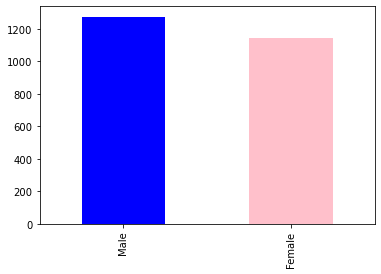

In [67]:
Org_Attrib['Gender'].value_counts().plot.bar(color=['blue','pink'])
#Saving the plot as an image


<AxesSubplot:>

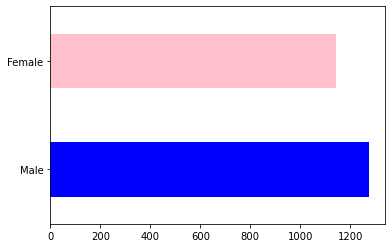

In [68]:
Org_Attrib['Gender'].value_counts().plot.barh(color=['blue','pink'])

<AxesSubplot:>

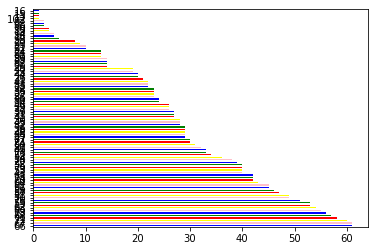

In [69]:
Org_Attrib['Age  Years'].value_counts().plot.barh(color=['blue','pink','yellow','red', 'green'])

In [72]:
Org_Attrib.groupby('Gender').Age__Years.plot(kind='kde')

Org_Attrib

AttributeError: 'DataFrameGroupBy' object has no attribute 'Age__Years'

In [73]:
Org_Attrib['age'] = Org_Attrib['Age  Years']

#df1.groupby('sex').age.plot(kind='kde')

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

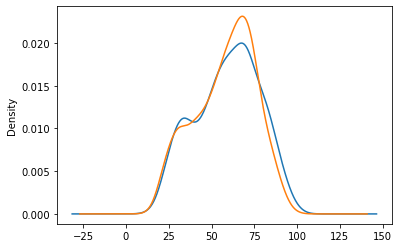

In [75]:
Org_Attrib.groupby('Gender').age.plot(kind='kde')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

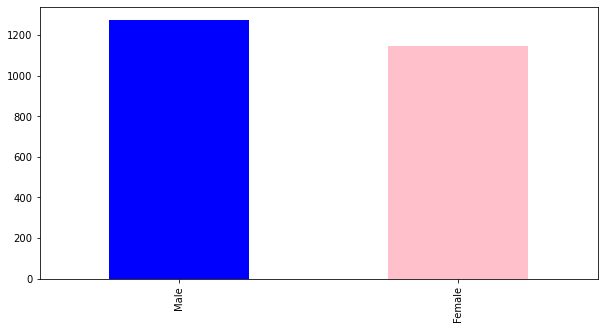

In [59]:
fig = plt.figure(figsize=(10,5))
fig = Org_Attrib['Gender'].value_counts().plot.bar(color=['blue','pink'])
#Saving the plot as an image
fig.savefig('C:/Users/josep/Documents/Kaleida/PDFS/Gender_Bar_Plot.jpg', bbox_inches='tight', dpi=150) 
fig.show()

 

In [ ]:
# Draw a vertical bar chart
Org_Attrib.plot.bar(x="Gender", y="Visits", rot=70, title="Number of tourist visits - Year 2018");
plot.show(block=True);

<AxesSubplot:ylabel='Frequency'>

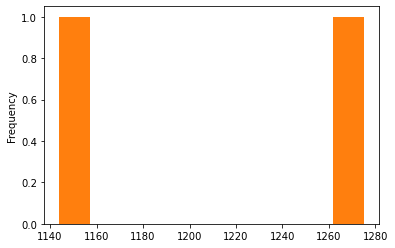

In [55]:
Org_Attrib.groupby('Gender').size().plot.hist()
Org_Attrib['Gender'].value_counts().plot.hist()

In [ ]:
import dataframe_image as dfi
 
df = pd.DataFrame({'A': [1,2,3,4],
                   'B':['A','B','C','D']})
 
dfi.export(df, 'dataframe.png')

In [12]:
# Local libraries
from time_series_analysis import plot_states, plot_countries
from daily_counts import plot_daily_count_states, plot_daily_count_countries
from create_case_maps import plot_usa_case_map, plot_global_case_map
from helper import Mode

WIDTH = 210
HEIGHT = 297

TEST_DATE = "10/20/20"

def create_title(day, pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
  pdf.set_font('Arial', '', 24)  
  pdf.ln(60)
  pdf.write(5, f"Covid Analytics Report")
  pdf.ln(10)
  pdf.set_font('Arial', '', 16)
  pdf.write(4, f'{day}')
  pdf.ln(5)

def create_analytics_report(day=TEST_DATE, filename="report.pdf"):
  pdf = FPDF() # A4 (210 by 297 mm)

  states = ['Massachusetts', 'New Hampshire']

  ''' First Page '''
  pdf.add_page()
  pdf.image("./resources/letterhead_cropped.png", 0, 0, WIDTH)
  create_title(day, pdf)

  plot_usa_case_map("./tmp/usa_cases.png", day=day)
  prev_days = 250
  plot_states(states, days=prev_days, filename="./tmp/cases.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths.png", end_date=day)

  pdf.image("./tmp/usa_cases.png", 5, 90, WIDTH-20)
  pdf.image("./tmp/cases.png", 5, 200, WIDTH/2-10)
  pdf.image("./tmp/deaths.png", WIDTH/2, 200, WIDTH/2-10)

  ''' Second Page '''
  pdf.add_page()

  plot_daily_count_states(states, day=day, filename="./tmp/cases_day.png")
  plot_daily_count_states(states, day=day, mode=Mode.DEATHS, filename="./tmp/deaths_day.png")
  pdf.image("./tmp/cases_day.png", 5, 20, WIDTH/2-10)
  pdf.image("./tmp/deaths_day.png", WIDTH/2, 20, WIDTH/2-10)

  prev_days = 7
  plot_states(states, days=prev_days, filename="./tmp/cases2.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths2.png", end_date=day)
  pdf.image("./tmp/cases2.png", 5, 110, WIDTH/2-10)
  pdf.image("./tmp/deaths2.png", WIDTH/2, 110, WIDTH/2-10)

  prev_days = 30
  plot_states(states, days=prev_days, filename="./tmp/cases3.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths3.png", end_date=day)
  pdf.image("./tmp/cases3.png", 5, 200, WIDTH/2-10)
  pdf.image("./tmp/deaths3.png", WIDTH/2, 200, WIDTH/2-10)

  ''' Third Page '''
  pdf.add_page()

  plot_global_case_map("./tmp/global_cases.png", day=day)

  countries = ['US', 'India', 'Brazil']
  prev_days = 7
  plot_countries(countries, days=prev_days, filename="./tmp/cases4.png", end_date=day)
  plot_countries(countries, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths4.png", end_date=day)

  pdf.image("./tmp/global_cases.png", 5, 20, WIDTH-20)
  pdf.image("./tmp/cases4.png", 5, 130, WIDTH/2-10)
  pdf.image("./tmp/deaths4.png", WIDTH/2, 130, WIDTH/2-10)

  pdf.output(filename, 'F')


if __name__ == '__main__':
  yesterday = (datetime.today() - timedelta(days=1)).strftime("%m/%d/%y").replace("/0","/").lstrip("0")
  yesterday = "10/10/20" # Uncomment line for testing
  
  create_analytics_report(yesterday)

ImportError: cannot import name 'plot_states' from 'time_series_analysis' (C:\Users\josep\anaconda3\lib\site-packages\time_series_analysis\__init__.py)

In [9]:
# Python Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local files
from helper import Mode, load_relevant_data

ModuleNotFoundError: No module named 'grp'

In [30]:
# Python Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local files
from helper import Mode, load_relevant_data

TEST_DATE = "10/20/20"

def plot_daily_count_states(states=['Massachusetts'], day=TEST_DATE, mode=Mode.CASES, filename=None):
	COLUMN = 'Province_State'
	df = load_relevant_data(True, mode).groupby(COLUMN).sum().reset_index()
	plot_data(df, states, day, mode, COLUMN, filename)

def plot_daily_count_countries(countries=['US'], day=TEST_DATE, mode=Mode.CASES, filename=None):
	COLUMN = 'Country/Region'
	df = load_relevant_data(False, mode).groupby(COLUMN).sum().reset_index()
	plot_data(df, countries, day, mode, COLUMN, filename)

def plot_data(df, places, day, mode, column, filename):
	n = len(places)
	colors = plt.cm.Reds(np.linspace(0.35,0.65,n))

	values = []
	for index, place in enumerate(places):
		cumulative_data = df[df[column] == place]
		start_column = cumulative_data.columns.get_loc("1/22/20")
		counts = cumulative_data.iloc[:, start_column:].diff(axis=1) # Converts from total case count to daily case count
		values.append(int(counts[day]))

	plt.bar(places, values, color=colors)
	label_figure(day, mode, filename)
	
def label_figure(day, mode, filename):
	plt.title(f'{mode}, {day}')
	plt.ylabel(f"{mode}")
	filename = filename if filename else f'{mode}_{day.replace("/", "-")}.png'
	plt.savefig(filename)
	plt.close()

if __name__ == '__main__':
	
	states = ["Massachusetts", "New Hampshire", "Rhode Island"]
	plot_daily_count_states(states, day="10/10/20")
	plot_daily_count_states(states, mode=Mode.DEATHS)

	plot_daily_count_countries(["India", "US", "Brazil"])


ModuleNotFoundError: No module named 'grp'

In [ ]:
pip install 

In [ ]:
# Python libraries
from fpdf import FPDF
from datetime import datetime, timedelta
import os

# Local libraries
from time_series_analysis import plot_states, plot_countries
from daily_counts import plot_daily_count_states, plot_daily_count_countries
from create_case_maps import plot_usa_case_map, plot_global_case_map
from helper import Mode

WIDTH = 210
HEIGHT = 297

TEST_DATE = "10/20/20"

def create_title(day, pdf):
  # Unicode is not yet supported in the py3k version; use windows-1252 standard font
  pdf.set_font('Arial', '', 24)  
  pdf.ln(60)
  pdf.write(5, f"Covid Analytics Report")
  pdf.ln(10)
  pdf.set_font('Arial', '', 16)
  pdf.write(4, f'{day}')
  pdf.ln(5)

def create_analytics_report(day=TEST_DATE, filename="report.pdf"):
  pdf = FPDF() # A4 (210 by 297 mm)

  states = ['Massachusetts', 'New Hampshire']

  ''' First Page '''
  pdf.add_page()
  pdf.image("./resources/letterhead_cropped.png", 0, 0, WIDTH)
  create_title(day, pdf)

  plot_usa_case_map("./tmp/usa_cases.png", day=day)
  prev_days = 250
  plot_states(states, days=prev_days, filename="./tmp/cases.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths.png", end_date=day)

  pdf.image("./tmp/usa_cases.png", 5, 90, WIDTH-20)
  pdf.image("./tmp/cases.png", 5, 200, WIDTH/2-10)
  pdf.image("./tmp/deaths.png", WIDTH/2, 200, WIDTH/2-10)

  ''' Second Page '''
  pdf.add_page()

  plot_daily_count_states(states, day=day, filename="./tmp/cases_day.png")
  plot_daily_count_states(states, day=day, mode=Mode.DEATHS, filename="./tmp/deaths_day.png")
  pdf.image("./tmp/cases_day.png", 5, 20, WIDTH/2-10)
  pdf.image("./tmp/deaths_day.png", WIDTH/2, 20, WIDTH/2-10)

  prev_days = 7
  plot_states(states, days=prev_days, filename="./tmp/cases2.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths2.png", end_date=day)
  pdf.image("./tmp/cases2.png", 5, 110, WIDTH/2-10)
  pdf.image("./tmp/deaths2.png", WIDTH/2, 110, WIDTH/2-10)

  prev_days = 30
  plot_states(states, days=prev_days, filename="./tmp/cases3.png", end_date=day)
  plot_states(states, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths3.png", end_date=day)
  pdf.image("./tmp/cases3.png", 5, 200, WIDTH/2-10)
  pdf.image("./tmp/deaths3.png", WIDTH/2, 200, WIDTH/2-10)

  ''' Third Page '''
  pdf.add_page()

  plot_global_case_map("./tmp/global_cases.png", day=day)

  countries = ['US', 'India', 'Brazil']
  prev_days = 7
  plot_countries(countries, days=prev_days, filename="./tmp/cases4.png", end_date=day)
  plot_countries(countries, days=prev_days, mode=Mode.DEATHS, filename="./tmp/deaths4.png", end_date=day)

  pdf.image("./tmp/global_cases.png", 5, 20, WIDTH-20)
  pdf.image("./tmp/cases4.png", 5, 130, WIDTH/2-10)
  pdf.image("./tmp/deaths4.png", WIDTH/2, 130, WIDTH/2-10)

  pdf.output(filename, 'F')


if __name__ == '__main__':
  yesterday = (datetime.today() - timedelta(days=1)).strftime("%m/%d/%y").replace("/0","/").lstrip("0")
  yesterday = "10/10/20" # Uncomment line for testing
  
  create_analytics_report(yesterday)